In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.3/269.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', '82ce3bfa143c4892b6e1d4f27189fa70')

In [ ]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [4]:
results = search_images_bing(key, 'boots')
ims = results.attrgot('contentUrl')
len(ims)

150

In [9]:
#hide
ims = ['https://m.media-amazon.com/images/I/81aw6vvX5EL._AC_SL1500_.jpg']

In [10]:
dest = 'images/shoes.jpg'
download_url(ims[0], dest)

Path('images/shoes.jpg')

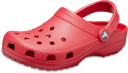

In [11]:
im = Image.open(dest)
im.to_thumb(128,128)

In [14]:
shoe_types = 'boots','crocs','ballerina flats'
path = Path('shoes')

In [13]:
if not path.exists():
    path.mkdir()
    for o in shoe_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o}')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [15]:
fns = get_image_files(path)
fns

(#371) [Path('shoes/ballerina flats/d1d7b6f6-7365-4f18-9ee1-795a705695ed.jpeg'),Path('shoes/ballerina flats/90b9b2ce-cdd4-423b-b5ee-5ce625139921.jpg'),Path('shoes/ballerina flats/e5b39be7-07e8-48a2-ab70-5a209e814225.png'),Path('shoes/ballerina flats/492ca8bb-4835-4160-a088-7be762087c29.jpg'),Path('shoes/ballerina flats/21601a8c-7697-4a7a-a79d-70993ffda0ca.jpg'),Path('shoes/ballerina flats/cb82749b-c107-478a-bbed-335c0def0174.jpg'),Path('shoes/ballerina flats/e9ab9c21-752f-478f-9b0a-3750ec36188b.jpg'),Path('shoes/ballerina flats/430e91f4-ef9e-43f7-a27e-cec9cf9c91ef.jpg'),Path('shoes/ballerina flats/bfc682e2-b62c-4be7-b7d1-ad9270f34e62.jpeg'),Path('shoes/ballerina flats/26f882f6-f7c8-4ed9-a098-a6da74ba7992.jpg')...]

In [16]:
failed = verify_images(fns)
failed

(#2) [Path('shoes/boots/fea314e5-b3c1-41cd-a593-38b4bd7b604f.jpg'),Path('shoes/boots/a3f4ddb8-23b3-43a0-80b5-c52a736e189f.jpg')]

In [17]:
failed.map(Path.unlink);

In [18]:
shoes = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [19]:
dls = shoes.dataloaders(path)

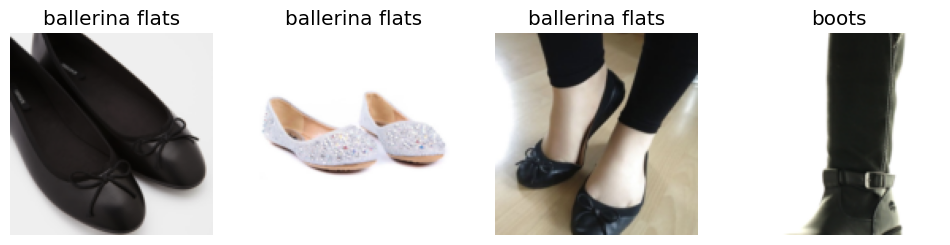

In [20]:
dls.valid.show_batch(max_n=4, nrows=1)

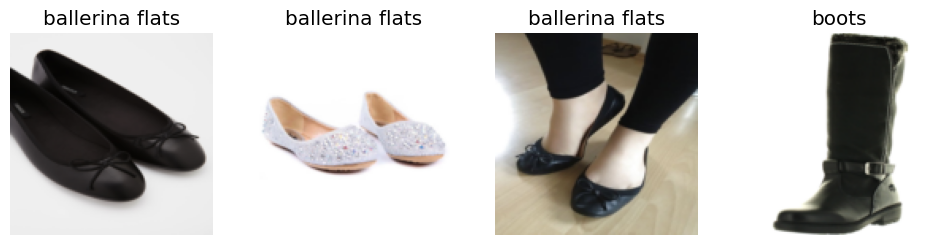

In [21]:
shoes = shoes.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = shoes.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

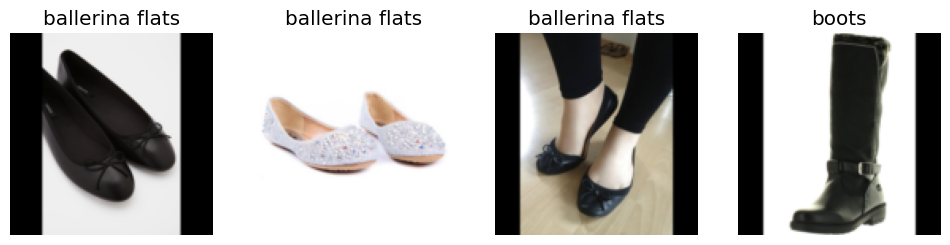

In [22]:
shoes = shoes.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = shoes.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

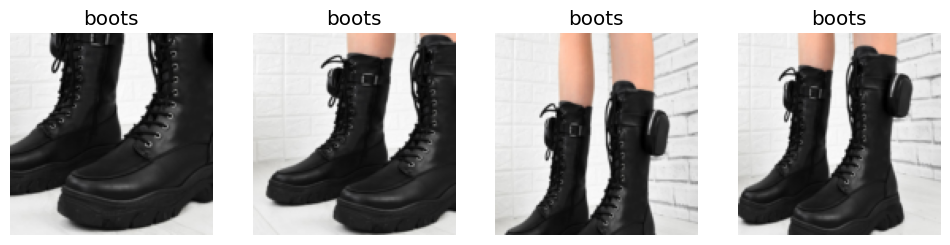

In [23]:
shoes = shoes.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = shoes.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

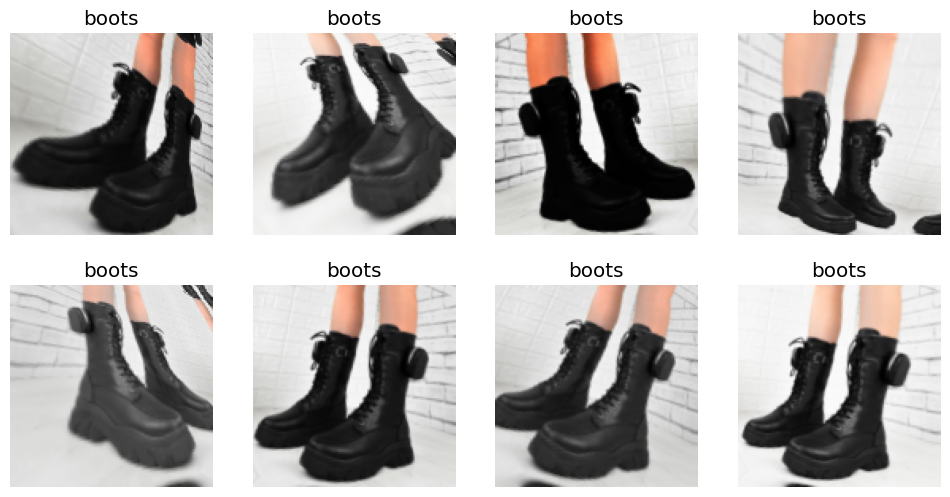

In [24]:
shoes = shoes.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = shoes.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [25]:
shoes = shoes.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = shoes.dataloaders(path)

In [26]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 212MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.606819,0.730277,0.273973,00:27


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.485957,0.298241,0.164384,00:23
1,0.375982,0.103701,0.041096,00:24
2,0.281387,0.038726,0.000000,00:23
3,0.216982,0.029811,0.000000,00:23


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


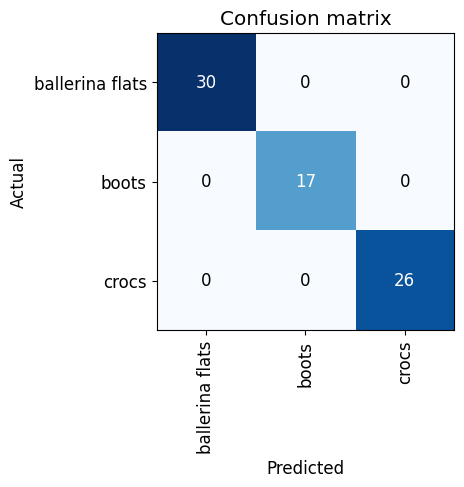

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

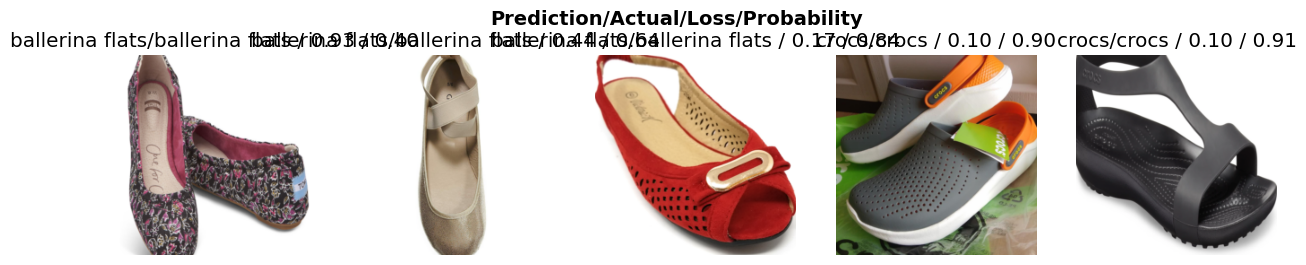

In [28]:
interp.plot_top_losses(5, nrows=1)

In [29]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [30]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,shoe in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/shoe)

In [31]:
learn.export()

In [32]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [33]:
learn_inf = load_learner(path/'export.pkl')

In [34]:
learn_inf.predict('images/shoes.jpg')

('crocs', tensor(2), tensor([1.6839e-08, 1.4430e-05, 9.9999e-01]))

In [35]:
learn_inf.dls.vocab

['ballerina flats', 'boots', 'crocs']

In [81]:
img = PILImage.create(upload.data[-1])

In [74]:
import ipywidgets as widgets

In [80]:
from ipywidgets import FileUpload
upload = FileUpload(accept='.jpg', multiple=False)
upload

FileUpload(value={}, accept='.jpg', description='Upload')

In [82]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [83]:
pred,pred_idx,probs = learn_inf.predict(img)

In [84]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: crocs; Probability: 1.0000')

In [86]:
classify = widgets.Button(
    description='Classify',
    disabled=False,
    button_style='',
    tooltip='Classify',
    icon='check'
    )

def on_click_classify(change):
    img = PILImage.create(upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
    
classify
classify.on_click(on_click_classify)


In [88]:
VBox([widgets.Label('Select your shoe!'), 
      upload, classify, out_pl, lbl_pred])

### Turning Your Notebook into a Real App

In [46]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [89]:
#hide
!pip install voila
!jupyter serverextension enable --sys-prefix voila 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 13.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: jsonschema
    Found existing installation: jsonschema 4.3.3
    Uninstalling jsonschema-4.3.3:
      Successfully uninstalled jsonschema-4.3.3


Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
      voila 0.4.0 OK
